# **Тема “Обучение без учителя”**

### **Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

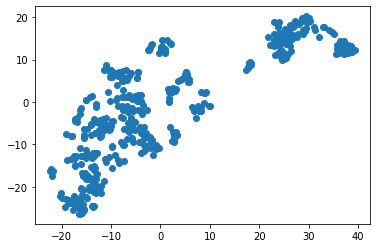

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### **Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

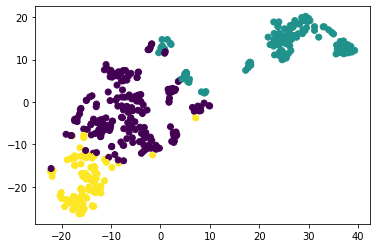

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [10]:
print('первый кластер - средняя цена: ', y_train[labels_train == 0].mean())
print('первый кластер - средний уровень преступности: ', X_train.loc[labels_train == 0, 'CRIM'].mean())

первый кластер - средняя цена:  24.958115183246072
первый кластер - средний уровень преступности:  0.42166020942408367


In [11]:
print('второй кластер - средняя цена: ', y_train[labels_train == 1].mean())
print('второй кластер - средний уровень преступности: ', X_train.loc[labels_train == 1, 'CRIM'].mean())

второй кластер - средняя цена:  16.165354330708663
второй кластер - средний уровень преступности:  10.797028425196853


In [12]:
print('третий кластер - средняя цена: ', y_train[labels_train == 2].mean())
print('третий кластер - средний уровень преступности: ', X_train.loc[labels_train == 2, 'CRIM'].mean())

третий кластер - средняя цена:  27.78837209302326
третий кластер - средний уровень преступности:  0.07356558139534886


### *** Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [0]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [14]:
print('первый кластер - средняя цена: ', y_test[labels_test == 0].mean())
print('первый кластер - средний уровень преступности: ', X_test.loc[labels_test == 0, 'CRIM'].mean())

первый кластер - средняя цена:  16.710526315789473
первый кластер - средний уровень преступности:  9.419181842105264


In [15]:
print('второй кластер - средняя цена: ', y_test[labels_test == 1].mean())
print('второй кластер - средний уровень преступности: ', X_test.loc[labels_test == 1, 'CRIM'].mean())

второй кластер - средняя цена:  22.690909090909095
второй кластер - средний уровень преступности:  0.21929690909090907


In [16]:
print('третий кластер - средняя цена: ', y_test[labels_test == 2].mean())
print('третий кластер - средний уровень преступности: ', X_test.loc[labels_test == 2, 'CRIM'].mean())

третий кластер - средняя цена:  34.3111111111111
третий кластер - средний уровень преступности:  0.04070333333333334
